# Домашнее задание к лекции \"Визуализация данных\""
## Обязательная часть
    Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 
    Требования к анализу:
   - построить не менее 4 визуализаций различных видов;
   - каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
   - по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?.

## Доклад о мировом счастье
Будем анализировать данные об уровне счастья в странах, датасет берем отсюда:  
https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

### Контекст
Доклад о мировом счастье - это знаковое исследование состояния глобального счастья . Доклад продолжает получать глобальное признание по мере того, как правительства, организации и гражданское общество все чаще используют показатели счастья для обоснования своих политических решений. Ведущие эксперты в различных областях – экономике, психологии, анализе обследований, национальной статистике, здравоохранении, государственной политике и других – описывают, как измерения благосостояния могут быть эффективно использованы для оценки прогресса стран. В докладах рассматривается состояние счастья в современном мире и показано, как новая наука о счастье объясняет личные и национальные различия в счастье.

### Содержание
Оценки и рейтинги счастья основаны на данных Всемирного опроса Гэллапа . Столбцы, следующие за баллом счастья, оценивают степень, в которой каждый из шести факторов – экономическое производство, социальная поддержка, ожидаемая продолжительность жизни, свобода, отсутствие коррупции и щедрость – способствуют тому, чтобы оценки жизни в каждой стране были выше, чем в Антиутопии, гипотетической стране, которая имеет значения, равные самым низким национальным средним в мире для каждого из шести факторов. Они никак не влияют на общий балл по каждой стране, но объясняют, почему некоторые страны занимают более высокие позиции, чем другие.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
df_happy = pd.read_csv('world-happiness-report-2021.csv')
df_happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [24]:
df_happy.shape

(149, 20)

Оставим только "интересные" столбцы

In [25]:
df_happy = df_happy[['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                     'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
df_happy.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


Посмотрим распределение уровня счастья (ladder score) через гистограмму и box plot

<AxesSubplot:ylabel='Frequency'>

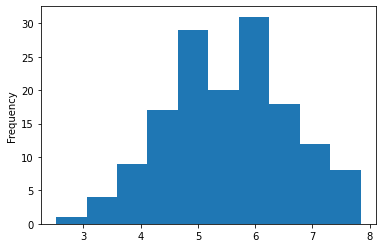

In [55]:
df_happy['Ladder score'].plot(kind='hist')

<AxesSubplot:>

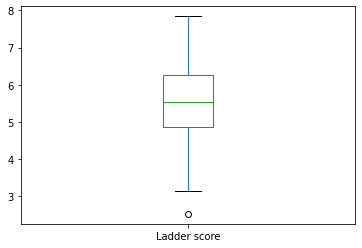

In [56]:
df_happy['Ladder score'].plot(kind='box')

Видно что идет небольшое смещение в сторону более счастливого общества и есть один выброс внизу.

#### Посмотрим на графиках как уровень счастья (Ladder score) будет зависить от разных показателей (ВВП на душу населения, соц. поддержка, восприятие коррупции итд)

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='Ladder score'>

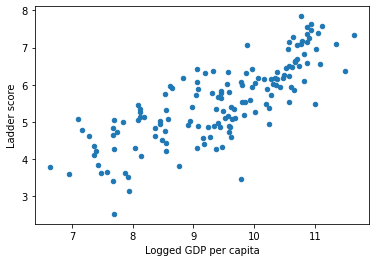

In [15]:
df_happy.plot(kind='scatter', x='Logged GDP per capita', y='Ladder score')

Видим, что в среднем чем выше ВВП на душу населения. тем выше уровень счастья.

<AxesSubplot:xlabel='Social support', ylabel='Ladder score'>

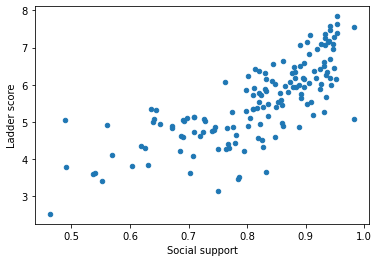

In [16]:
df_happy.plot(kind='scatter', x='Social support', y='Ladder score')

Похожая картина, но зависимость скорее не линейная, в соц. поддержке примерно до 0.8 уровень счастья особо не меняется, а вот выше уже рост, причем предположительно по параболе

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Ladder score'>

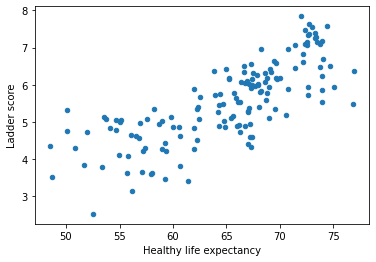

In [17]:
df_happy.plot(kind='scatter', x='Healthy life expectancy', y='Ladder score')

Уровень счастья также некоторым образом коррелирует с ожидаемой продолжительностью жизни - чем выше, тем выше уроверь счастья.

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Ladder score'>

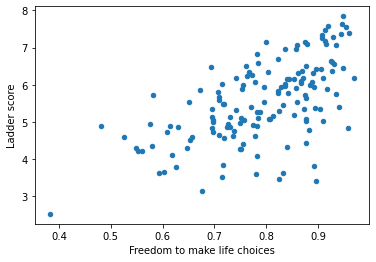

In [19]:
df_happy.plot(kind='scatter', x='Freedom to make life choices', y='Ladder score')

Похожая картина относительно свободы делать жизненный выбор

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Ladder score'>

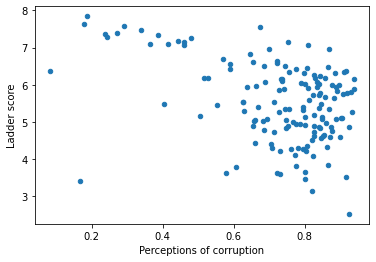

In [21]:
df_happy.plot(kind='scatter', x='Perceptions of corruption', y='Ladder score')

Как ни странно, но восприятие коррупции не сильно влияет на уровень счастья, да, при низком показателе коррупции есть высокий уровень счастья, но освновная масса данных не очень зависит от нее.

### Посмотрим как средний уровень счастья зависит от региона

In [52]:
by_region = (df_happy[['Regional indicator', 'Ladder score']].groupby('Regional indicator').
             mean().sort_values(by='Ladder score', ascending=False)
            )
by_region

,Ladder score
Regional indicator,
North America and ANZ,7.128500
Western Europe,6.914905
Central and Eastern Europe,5.984765
Latin America and Caribbean,5.908050
East Asia,5.810333
Commonwealth of Independent States,5.467000
Southeast Asia,5.407556
Middle East and North Africa,5.219765
Sub-Saharan Africa,4.494472


<AxesSubplot:xlabel='Regional indicator'>

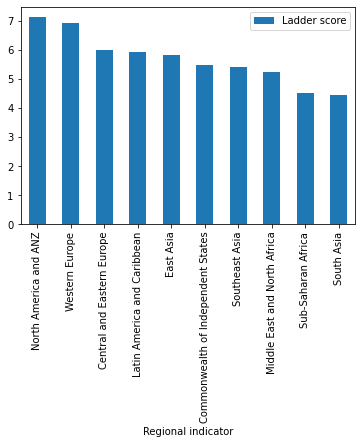

In [53]:
by_region.plot(kind='bar')

Видно что наиболее высокий уровень счастья в Северной Америке и западной Европе, а наиболее низкий  
в Центральной Африке и Южной Азии.